In [26]:
import pandas as pd
import numpy as np
import os
import re
import collections
import nltk
from konlpy.tag import Twitter
from time import time
import pickle

In [2]:
cosmetic = pd.read_csv('../dataset/cosmetics_reviews_cleaning.csv')

In [37]:
len(cosmetic)

21226

##### 평점이 5점 초과인 이상한 데이터 삭제

In [31]:
cosmetic[cosmetic['point'] > 5]

,product,brand_name,img_link,point,review
5404,에코 세이프티 아쿠아 데일리 선젤 SPF30 PA++,이니스프리,http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,15.79,에공 이거 완전 좋은데 왜때문에 단종됐죠 리뉴얼되서 나올라나요 평소 선크림 답답...


In [33]:
cosmetic = cosmetic.drop(5404)

##### 리뷰 칼럼 중에 데이터타입이 float로 되어 있는 것 발견 -->  데이터 삭제

In [86]:
reviews = cosmetic['review']

In [87]:
review_types = [type(review) for review in reviews]

In [89]:
for t in review_types:
    if t != str:
        print(t)

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [123]:
for idx, review in enumerate(reviews):
    if type(review) != str:
        print(idx+1, review)

8696 nan
12791 nan
14674 nan
19695 nan


In [129]:
cosmetic[8695:8696]

,product,brand_name,img_link,point,review
8696,베이비페이스 마스카라,잇츠스킨(이츠스킨),http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,1.67,NaN


In [130]:
cosmetic = cosmetic.drop(8696)
cosmetic = cosmetic.drop(12791)
cosmetic = cosmetic.drop(14674)
cosmetic = cosmetic.drop(19695)

In [142]:
cosmetic.reset_index(drop=True, inplace=True)

In [147]:
cosmetic = cosmetic.drop(columns=['index'])
cosmetic

,product,brand_name,img_link,point,review
0,틴트바 트리플샷,VDL(브이디엘),http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,3.30,트리플어피치 쓰는데 음 발색도 별로 텍스쳐가 정말 뭐라하지 너무 기름진데 촉촉...
1,틴트바 밀크콜라다,VDL(브이디엘),http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,4.20,치크로만 쓰는데 굉장히 여리여리라게 발색됨
2,틴트바 젤티니,VDL(브이디엘),http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,3.13,색은 둘째치고 틴트가 지속력이 없음 올려도 지워지니 살 필요가 없다 립브러쉬 쓰...
3,겔랑 루즈 G 드 세리 느와르 쥬얼 립스틱 컴팩트,겔랑,http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,3.96,루즈G 립스틱이랑 세트인 컴팩트 일단 컴팩트 디자인이 엄청 다양해요 심플한 검...
4,루즈 오토마띠끄,겔랑,http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,4.21,164 쓰는데 고급진 핑크에요 발림성이 너무 맘에 들었어요 지속은 좀 아쉬웠고 ...
5,크렘 드 루즈 G,겔랑,http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,4.80,원래 립스틱타입 쓰다가 매장언니 추천으로 샀는데 이가격에도 쓰게되는 애증의 아이템임...
6,립스틱,나스(NARS),http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,4.35,여름이라 팔꿈치랑 복숭아뼈 같은부위는 되게 자주 스크럽하는 편인데 꽤 깨끗하게 잘 ...
7,샤인 블라썸 로즈 립스틱,네이처리퍼블릭,http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,2.14,케이스 이뻐서 샀는데 너무 촉촉함 지속력이 너무 없다 그래도 꿋꿋이 발랐었어요
8,레브드미엘 스틱레브르,눅스(NUXE),http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,3.85,상큼한 레몬향 촉촉하고 산뜻하게 보습이 돼요 겨울에는 좀 부족할 듯 다른 립밤들보다...
9,본 리피립밤 스트로베리,더바디샵,http://d9vmi5fxk1gsw.cloudfront.net/home/glowm...,3.17,케이스 귀엽 향은 진짜 좋음 이것만 바르면 목이 따갑고 먼지 먹은 느낌 정말 싫음


In [150]:
reviews = cosmetic['review']
for idx, review in enumerate(reviews):
    if type(review) != str:
        print(idx+1, review)
# 제거완료

In [152]:
cosmetic.to_csv("../dataset/cosmetics_reviews_EDA.csv", encoding='utf-8', index=False)

##### 데이터 탐색 by nltk.Text()

In [53]:
# 로드
import pickle
f = open('../dataset/tokens_selected.pickle', 'rb')
tokens = pickle.load(f)

In [54]:
text = nltk.Text(tokens, name='Cosmetic')
text

<Text: Cosmetic>

In [55]:
text.vocab()

FreqDist({'하다/Verb': 22910, '좋다/Adjective': 15460, '쓰다/Verb': 11865, '있다/Adjective': 7274, '같다/Adjective': 6840, '바르다/Verb': 6564, '향/Noun': 6489, '않다/Verb': 6016, '되다/Verb': 5975, '제품/Noun': 5817, ...})

In [56]:
print(len(text.tokens))       # returns number of tokens
print(len(set(text.tokens)))  # returns number of unique tokens
text.vocab().most_common(10)  # returns frequency distribution

637830
16338


[('하다/Verb', 22910),
 ('좋다/Adjective', 15460),
 ('쓰다/Verb', 11865),
 ('있다/Adjective', 7274),
 ('같다/Adjective', 6840),
 ('바르다/Verb', 6564),
 ('향/Noun', 6489),
 ('않다/Verb', 6016),
 ('되다/Verb', 5975),
 ('제품/Noun', 5817)]

In [57]:
# 폰트 설정
from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

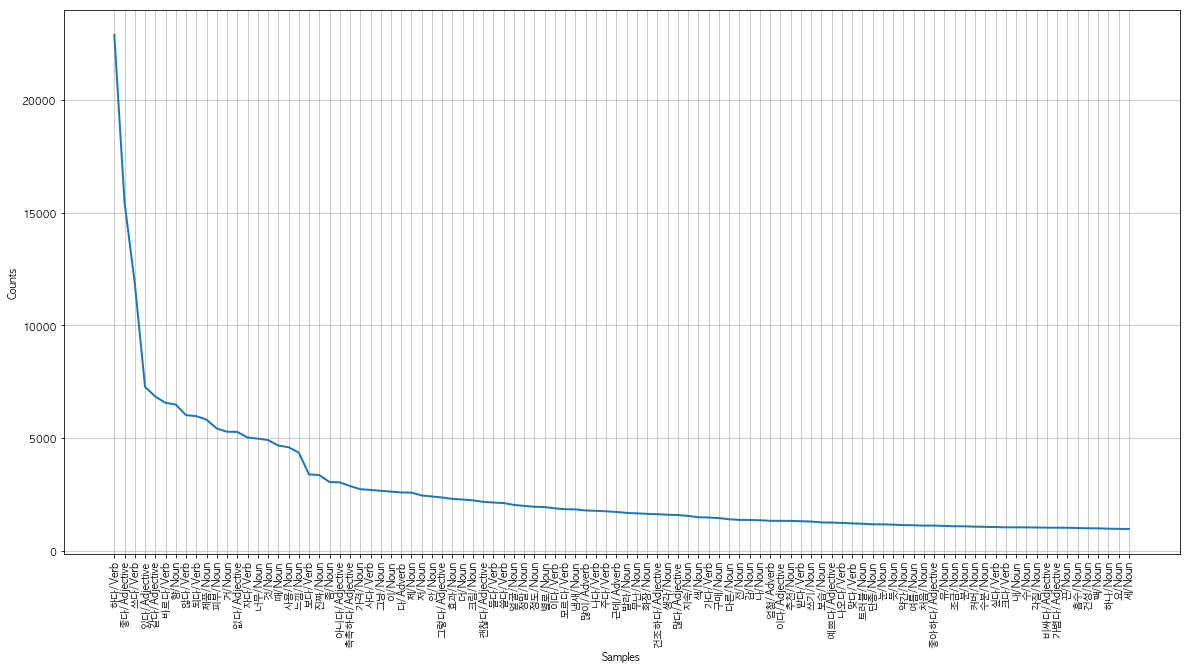

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
text.plot(100)
plt.show()

In [58]:
# Collocations(연어): 인접하게 빈번하게 등장하는 단어
text.collocations()

사용/Noun 하다/Verb; 것/Noun 같다/Adjective; 쓰다/Verb 보다/Verb; 수/Noun
있다/Adjective; 세/Noun 정력/Noun; 재다/Verb 의사/Noun; 유/Noun 분기/Noun; 산/Noun
뜻/Noun; 안/Noun 되다/Verb; 쏘다/Verb 쏘다/Verb; 선물/Noun 받다/Verb;
나쁘다/Adjective 않다/Verb; 꾸다/Verb 덕/Noun; 다음/Noun 날/Noun; 발라/Noun
주다/Verb; 세/Noun 일/Noun; 끈/Noun 적임/Noun; 가격/Noun 대비/Noun; 하다/Verb
때/Noun; 너무/Noun 좋다/Adjective


In [34]:
text.concordance('트러블/Noun')

Displaying 25 of 25 matches:
좋다/Adjective 알/Noun 쓰다/Verb 보다/Verb 트러블/Noun 올라오다/Verb 제품/Noun 디자인/Noun 하다/Verb 
Noun 뻑뻑/Noun 다크/Noun 닝/Noun 생기/Noun 트러블/Noun 쓸다/Verb 때/Noun 나다/Verb 나/Noun 최악/No
드름/Noun 많이/Adverb 들어가다/Verb 지성/Noun 트러블/Noun 자다/Verb 나/Noun 피부/Noun 화장품/Noun 고르다
rb 먹다/Verb 얼마/Noun 지나다/Verb 않다/Verb 트러블/Noun 나다/Verb 톤/Noun 좋다/Adjective 밀리/Noun
/Verb 일이/Noun 없다/Adjective 그치다/Verb 트러블/Noun 날/Noun 걱정/Noun 없다/Adjective 제/Noun 
부/Noun 거/Noun 쓰다/Verb 딱하다/Adjective 트러블/Noun 난/Noun 없다/Adjective 좋다/Adjective 엄청
oun 쓰다/Verb 않다/Verb 일단/Noun 민감/Noun 트러블/Noun 없다/Adjective 좋다/Adjective 좀묵/Noun 직
업/Noun 지속/Noun 좋다/Adjective 좁쌀/Noun 트러블/Noun 좀/Noun 나다/Verb 바르다/Verb 때/Noun 모르다/
/Noun 같다/Adjective 경우/Noun 바르다/Verb 트러블/Noun 나다/Verb 엄마/Noun 사/Noun 드리다/Verb 좋다/
밉다/Adjective 끌/Noun 거리/Noun 피부/Noun 트러블/Noun 미치다/Adjective 올라오다/Verb 같다/Adjectiv
좋다/Adjective 거/Noun 사용/Noun 하다/Verb 트러블/Noun 엄청/Adverb 많이/Adverb 들어가다/Verb 피부/No
/Verb 혔/Noun 거나/Noun 것/Noun 때문/Noun 트러블/Noun 나다/Verb 하다/Verb 적다/Verb 없다/Adjectiv

In [59]:
text.similar('좋다/Adjective')

No matches


In [74]:
selected_words = [f[0] for f in text.vocab().most_common(2000)]

def list_to_str(ls):
    string = ''
    for word in ls:
        string = string + word + ',\n'
    return string
words = list_to_str(selected_words)

In [75]:
with open('../dataset/words_labled.txt', 'wt') as f:
    f.write(words)